In [1]:
import tensorflow as tf

In [2]:
print("Tensorflow Version: ",tf.__version__)

Tensorflow Version:  2.11.0


In [3]:
# importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#reading our dataset
dataset = pd.read_csv('/content/aps_data.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


**Handling Missing Data**
1. **Note** : In our dataset there is no any nan value, we have 'na' string inplace of nan value so we need first replace with np.nan value and then proceed

In [6]:
dataset = dataset.replace('na',np.nan)

In [7]:
#checking the total no of NaN values w.r.t each cloumn
dataset.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [8]:
# to display the more records /rows 
pd.options.display.max_rows=1000

In [9]:
dataset.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [10]:
# calulating total nos. of nan values on our entire dataset
dataset.isnull().sum().sum()

71649

In [11]:
# now creating dataframe of having null values

df = dataset.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={0:'Null Value Count'})

In [12]:
df

,index,Null Value Count
0,br_000,4105
1,bq_000,4043
2,bp_000,3960
3,ab_000,3849
4,cr_000,3849
5,bo_000,3832
6,bn_000,3631
7,bm_000,3273
8,bl_000,2234
9,bk_000,1880


In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Count"})

,Null Value Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [15]:
#Filling null values in featues with median of that feature
len([feature for feature in dataset.columns if feature not in ['class']])

170

In [16]:
len([feature for feature in dataset.columns])

171

In [17]:
[feature for feature in dataset.columns][:5]

['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000']

In [18]:
[feature for feature in dataset.columns if feature not in ['class']][:5]

['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000']

In [19]:
for feature in [feature for feature in dataset.columns if feature not in ['class']]:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [20]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
av_000    0
ax_000    0
ay_000    0
ay_001    0
ay_002    0
ay_003    0
ay_004    0
ay_005    0
ay_006    0
ay_007    0
ay_008    0
ay_009    0
az_000    0
az_001    0
az_002    0
az_003    0
az_004    0
az_005    0
az_006    0
az_007    0
az_008    0
az_009    0
ba_000    0
ba_001    0
ba_002    0
ba_003    0
ba_004    0
ba_005    0
ba_006    0
ba_007    0
ba_008    0
ba_009    0
bb_000    0
bc_000    0
bd_000    0
be_000    0
bf_000    0
bg_000    0
bh_000    0
bi_000    0
bj_000    0
bk_000    0
bl_000    0
bm_000    0
bn_000    0
bo_000    0
bp_000    0
bq_000    0
br_000    0
bs_000    0
bt_000    0
bu_000    0
bv_0

In [21]:
dataset.isnull().sum().sum()

0

In [22]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


**Segregating our dataset into Dependent variable(a.k.a Target column) and Independent variable(a.k.a feature column)**

In [23]:
X = dataset.drop('class',axis=1)

In [24]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,90,0,0,66,0,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,30,0.0,16,14,0,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,444,0.0,14,12,0,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,82,0.0,12,10,0,0,0,0,1464,4980,...,1010,132,310,56,92,1292,0,0,0,0


In [25]:
y = dataset['class']

In [26]:
y.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 170 entries, aa_000 to eg_000
dtypes: int64(1), object(169)
memory usage: 6.5+ MB


In [28]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [29]:
y = pd.get_dummies(y,drop_first=True)

In [30]:
y.head()

,pos
0,0
1,0
2,0
3,0
4,0


In [31]:
y.value_counts()

pos
0      4909
1        91
dtype: int64

**Train-Test Split**

In [32]:
import sklearn

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 170)
(4000, 1)
(1000, 170)
(1000, 1)


**Feature-Scaling**

**Why scaling required in ANN ?**

because in optimiser we are using gradient-descent and if we want to convergence to its local minima as soon as possible so for that
we should scale our value




In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [38]:
X_train = sc.fit_transform(X_train)

In [39]:
X_test = sc.transform(X_test)

# Implementation of ANN 

In [40]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [41]:
Classifier = Sequential()

In [42]:
Classifier.add(Dense(units=10, kernel_initializer= 'he_uniform',activation='relu',input_dim = 170))
Classifier.add(Dense(units=10, kernel_initializer= 'he_uniform',activation='relu'))
Classifier.add(Dense(units=1, kernel_initializer= 'glorot_uniform',activation='sigmoid'))

In [43]:
#performing back propagation
Classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_histroy = Classifier.fit(X_train, y_train, batch_size=10, epochs= 20)

Epoch 1/20
400/400 [==============================] - 11s 6ms/step - loss: 0.5246 - accuracy: 0.8460
Epoch 2/20
400/400 [==============================] - 2s 4ms/step - loss: 0.0817 - accuracy: 0.9855
Epoch 3/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0451 - accuracy: 0.9872
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9905
Epoch 5/20
400/400 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9912
Epoch 6/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 7/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0210 - accuracy: 0.9945
Epoch 8/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9933
Epoch 9/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 10/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.994

In [46]:
# to check components
model_histroy.history.keys()

dict_keys(['loss', 'accuracy'])

In [47]:
# If we want to validate our model from training data itself and we will use test data for prediction
model_histroy = Classifier.fit(X_train, y_train, batch_size=10, epochs= 30, validation_split=0.25)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 0.9970 - val_loss: 0.0175 - val_accuracy: 0.9950
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0123 - accuracy: 0.9957 - val_loss: 0.0098 - val_accuracy: 0.9980
Epoch 3/30
300/300 [==============================] - 2s 6ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0096 - val_accuracy: 0.9980
Epoch 4/30
300/300 [==============================] - 2s 6ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0097 - val_accuracy: 0.9980
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0101 - val_accuracy: 0.9980
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0105 - val_accuracy: 0.9980
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0116 - val_accuracy: 0.9970
Epoch 

In [48]:
model_histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
# accuracy w.r.t each epochs
model_histroy.history['accuracy']

[0.996999979019165,
 0.9956666827201843,
 0.9993333220481873,
 0.9993333220481873,
 0.9993333220481873,
 0.9993333220481873,
 0.999666690826416,
 0.999666690826416,
 0.999666690826416,
 0.9993333220481873,
 0.999666690826416,
 0.9986666440963745,
 0.999666690826416,
 0.9983333349227905,
 0.9993333220481873,
 0.9993333220481873,
 1.0,
 1.0,
 1.0,
 0.999666690826416,
 0.9990000128746033,
 0.999666690826416,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

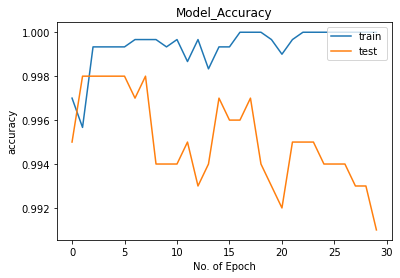

In [50]:
#plotting gapsh between train_accuracy and validation accuracy
plt.plot(model_histroy.history['accuracy'])
plt.plot(model_histroy.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('No. of Epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

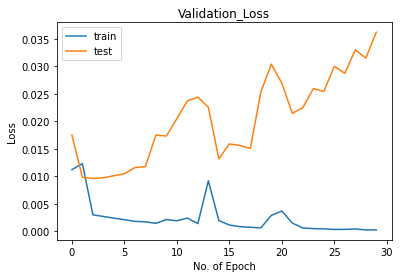

In [51]:
#plotting gapsh between train_loss and validation loss
plt.plot(model_histroy.history['loss'])
plt.plot(model_histroy.history['val_loss'])
plt.title('Validation_Loss')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [52]:
y_pred = Classifier.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [53]:
#putting threshold for the sigmoid
y_pred = y_pred>0.5

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
y_test.shape


(1000, 1)

In [56]:
y_pred.shape

(1000, 1)

In [57]:
confusion_matrix(y_test,y_pred)

array([[975,  11],
       [  5,   9]])

In [77]:
# To Save our model we will use .h5 file for DL model
import time
import os

def savemodel_path(model_dir = "SAVED_MODELs"):
  os.makedirs(model_dir, exist_ok = True)
  fileName  = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"Your Model has been Saved at the following location\n {model_path}")
  return model_path



In [78]:
Classifier.save(savemodel_path())

Your Model has been Saved at the following location
 SAVED_MODELs/Model_2023_03_11_20_35_30_.h5


# **hyperparameter tuning with Keras tunner**

In [ ]:
# pip install keras-tuner --upgrade

In [ ]:
# !pip install keras-tuner --upgrade

In [60]:
from keras_tuner.tuners import RandomSearch

In [61]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units=32, kernel_initializer= 'he_uniform',activation='relu',input_dim = 170))
  model.add(Dense(units=32, kernel_initializer= 'he_uniform',activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))
  optimizer = hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
  model.compile(optimizer=optimizer, loss = 'binary_crossentropy',metrics=['accuracy'])
  return model

In [62]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='project',project_name='aps-fault')

In [64]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.9670000076293945

Best val_accuracy So Far: 0.9900000095367432
Total elapsed time: 00h 00m 22s


In [67]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [71]:
my_model = tuner.get_best_models(num_models =1)[0]

In [72]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________
